# Task 3: Classification

The aim of this notebook is to perform a **predictive analysis** in order to classify our customers in three categories (high-spending, low-spending and medium-spending) on the basis of their shopping behaviour.

We will run, compare and discuss the performance of **10 different models**:

**Neighbors-based classifiers**
- K-Nearest Neighbors
- Radius-Neighbors

**Naive Bayes classifiers**
- Gaussian Naive Bayes
- Multinomial Naive Bayes

**Support Vector Machine**
- Support Vector Classification

**Machine Learning classifiers**
- Feed-forward Neural Network
- Multi-layer Perceptron

**Tree-based classifiers**
- Decision tree

**Ensemble Method**
- Random forest
- Voting classifier

At the end of this notebook, we propose an alternative classification having the label based on the clustering result of with DBSCAN.
In fact, given that this algorithm had already identified clusters of clients grouped according to their shopping behavior, we believe that it may be interesting to present this second analysis (in addition to the first one based on the Savg attribute) and show a comparison between the two approaches.
This second analysis will be performed on all the ten proposed classifiers.

### Import basic libraries

In [414]:
import statistics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

### Import dataset

In [415]:
incidents_num = pd.read_csv('dataset/incidents_num.csv')
incidents_cat = pd.read_csv('dataset/incidents_cat.csv')

# incidents_num with no NaN values
incidents_num.dropna(inplace=True)

pd.options.display.max_columns = None

In [416]:
incidents_num.head()

,Unnamed: 0,year,latitude,longitude,congressional_district,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,month,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city,n_killed_percentage,n_injured_percentage,n_participants_teen_percentage,n_participants_child_percentage,density,Median Age,Male Population,Female Population,Number of Veterans,Foreign-born,Average Household Size,povertyPercentage,candidatevotes,totalvotes,candidatevotes_ratio
357,357,2016,42.35,-83.06,13.0,0.0,0.0,3.0,1.0,0.0,0,0,0.0,3.0,3.0,11,0.0,0.0,1.0,0.33,0.0,0.00,0.00,1.00,0.00,6130,1829,0.00,0.00,0.0,0.00,1871.2,34.8,319265.0,357859.0,29511.0,39861.0,2.6,11.0,198771.0,257797.0,0.77
358,358,2016,42.42,-83.22,13.0,1.0,0.0,0.0,1.0,0.0,0,1,0.0,0.0,1.0,5,1.0,0.0,0.0,1.00,0.0,0.00,1.00,0.00,0.00,6130,1829,0.00,0.00,0.0,0.05,1871.2,34.8,319265.0,357859.0,29511.0,39861.0,2.6,11.0,198771.0,257797.0,0.77
359,359,2016,42.38,-83.00,13.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,10,0.0,0.0,1.0,1.00,0.0,1.00,0.00,0.00,0.00,6130,1829,0.01,0.00,0.0,0.00,1871.2,34.8,319265.0,357859.0,29511.0,39861.0,2.6,11.0,198771.0,257797.0,0.77
360,360,2016,42.36,-83.22,13.0,0.0,0.0,3.0,3.0,0.0,0,1,1.0,1.0,3.0,8,0.0,0.0,1.0,1.00,0.0,0.00,0.33,0.33,0.33,6130,1829,0.00,0.00,0.0,0.00,1871.2,34.8,319265.0,357859.0,29511.0,39861.0,2.6,11.0,198771.0,257797.0,0.77
361,361,2016,42.43,-83.20,13.0,0.0,0.0,4.0,2.0,2.0,1,2,0.0,1.0,4.0,10,0.0,0.0,1.0,0.50,0.5,0.25,0.50,0.25,0.00,6130,1829,0.01,0.01,0.0,0.00,1871.2,34.8,319265.0,357859.0,29511.0,39861.0,2.6,11.0,198771.0,257797.0,0.77


In [ ]:
incidents_num.info()

### Transform categorical features into numerical ones

In [417]:
# from sklearn.preprocessing import LabelEncoder
# import copy

# dataset_without_string = copy.copy(join_dataset)

# le = LabelEncoder()
# columns_not_numeric = [ 'state', 'city_or_county', 'address', 'incident_characteristics1', 'party']
# for column in columns_not_numeric:
#     dataset_without_string[column] = le.fit_transform(dataset_without_string[column])

# dataset_without_string.head()

In [418]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

NON AGGIUNGO ALTRO PER ORA
Per lavorare intanto senza considerare le variabili categoriche
DA RIAGGIUNGERE IN SEGUITO A NECESSITA'

### Compute labels

In [419]:
incidents_num.isnull().sum()

Unnamed: 0                         0
year                               0
latitude                           0
longitude                          0
congressional_district             0
n_participants_child               0
n_participants_teen                0
n_participants_adult               0
n_males                            0
n_females                          0
n_killed                           0
n_injured                          0
n_arrested                         0
n_unharmed                         0
n_participants                     0
month                              0
n_participants_child_ratio         0
n_participants_teen_ratio          0
n_participants_adult_ratio         0
n_males_ratio                      0
n_females_ratio                    0
n_killed_ratio                     0
n_injured_ratio                    0
n_unharmed_ratio                   0
n_arrested_ratio                   0
incidents_state                    0
incidents_city                     0
n

In [420]:
incidents_num['n_killed'].value_counts()

n_killed
0     24486
1      8841
2       603
3        81
4        14
5         8
50        1
Name: count, dtype: int64

In [421]:
incidents_num['isMurder'] = incidents_num['n_killed'] != 0

incidents_num.drop(columns=['n_killed', 'n_killed_ratio', 'n_killed_percentage'], inplace=True)

### Preparing the training set and test set

In [422]:
labels = []
for index, isMurder in incidents_num.isMurder.items():
    if isMurder == True:
        labels.append(0)
    else:
        labels.append(1)

In [423]:
from sklearn.model_selection import train_test_split
incidents_num.drop(columns=['isMurder'], inplace=True)
train_set, test_set, train_label, test_label = train_test_split(incidents_num, labels, stratify=labels, test_size=0.3)

### Aiding the implementation and evaluation of the classifiers with utility functions

In [424]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### Add labels on top of bar from bar plots

In [425]:
def autolabel(rects, i = None, j = None):
    if (i != None) and (j!=None): 
        target = axs[i][j]
    elif i != None:
        target = axs[i]
    else:
        target = axs    
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        target.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

#### Display correlations among the attributes

In [426]:
def display_corr(df, corr_threshold = 0.8):
    print('Correlations')
    print("Att. A\tAtt. B\tCorr(A,B)")
    for i in range(0, len(df.columns)):
        for j in range(i+1, len(df.columns)):
            corr = df[df.columns[i]].corr(df[df.columns[j]])
            if  corr > corr_threshold:
                print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.4f}'.format(corr))

#### Plot the whole array of scatter plots

In [427]:
def corr_plot(label, label_source):
    nrows, ncols = 5, 6
    index = 0
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,30))
    for i in range(len(cs_num_columns)):
        for j in range(i+1,len(cs_num_columns)):
            axs[int(index/ncols)][index%ncols].scatter(test_set.iloc[:, i].values, test_set.iloc[:, j].values, c=label, s=25, cmap='cividis')
            axs[int(index/ncols)][index%ncols].set_title('Correlation of ' + cs.columns[i] + ' and ' + cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_xlabel(cs.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_ylabel(cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            index = index + 1
    for i in range(int(index/ncols),nrows):
        for j in range(index%ncols,ncols):
            axs[i][j].remove()
    plt.suptitle(("Visualization of the " + label_source +  " with respect to different feature spaces"), fontsize=28, fontweight='bold')
    plt.show()

#### Print the classification scores

In [428]:
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred))

#### Identify the misclassification of a classifier

In [429]:
def spot_errors(test_label, test_pred):
    spot_errors = []
    for i in range(len(test_label)):
        if test_label[i] != test_pred[i]:
            spot_errors.append('darkred')
        else:
            spot_errors.append('darkgray')
    return spot_errors

#### Compares the true labels with the one predicted by a classifier while displaying the misclassification

In [430]:
def classification_visualizer(test_set, test_label, test_pred, classifier_name):
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    # Select the attributes to construct the dimensions
    a, b = 'n_injured_ratio', 'n_unharmed_ratio', 
    errors = spot_errors(test_label, test_pred)
    labels = [test_label, test_pred, errors]
    titles = ['True Labels', 'Predicted Labels', 'Misclassifications']

    for i in range(3):
        axs[i].scatter(test_set[a], test_set[b], c=labels[i], s=20, cmap='cividis')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(a, fontdict={'fontsize': 'large'})
        axs[i].set_ylabel(b, fontdict={'fontsize': 'large'})

    plt.suptitle(('Visualization of the ' + classifier_name + ' classifier on the test set'),
                 fontsize=24, fontweight='bold')

    plt.show()

#### Plot the confusion matrix of a classifier

In [431]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#compute and plot the confusion matrix 
def plot_c_matrix(test_set, test_label, test_pred, classifier, classifier_name, axs=None):
    cm = confusion_matrix(test_label, test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title('Confusion matrix of ' + classifier_name)
    plt.show() 

#### Plot the decision boundary of a classifier

In [432]:
import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

#compute and plot the decision boundary

def plot_decision_boundary(train_set, train_label, classifier, classifier_name, axs=None):
    X = train_set.values
    y = np.array(train_label)
    
    pca = PCA(n_components = 2)
    X = pca.fit_transform(X)
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(20,10))

    labels = [classifier_name]
    for clf, lab, grd in zip([classifier],
                         labels,
                         itertools.product([0, 1], repeat=2)):

        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        if axs:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=axs)
        else:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title('Decision boundary of ' + lab)

## Classifiers

### Decision Tree
A non-parametric supervised learning method used for classification and regression.
The deeper the tree, the more complex the decision rules and the fitter the model.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

#### Import libraries

In [433]:
from sklearn import tree
from scipy.stats import randint

#### Pre-processing

Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data
For classification with few classes, min_samples_leaf=1 is often the best choice.


#### Grid search
Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

In [434]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [435]:
dt_max_depth = [2,3,5,6,7,10,12, None]
dt_min_samples_split = randint(2, 51)
min_samples_leaf = randint(1, 51)
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features
            }

In [436]:
#define the number of iters (random combination to try)
n_iter_search = 50 #500
#define the number of jobs to run in parallel
n_jobs_search = -1

In [437]:
#define the grid search
dt_grid = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid, 
                            n_iter=n_iter_search,  
                            n_jobs=n_jobs_search,
                            scoring=make_scorer(accuracy_score))

In [438]:
dt_grid.fit(train_set, train_label)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6804855f50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6804854710>,
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score))

In [439]:
print(dt_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 46, 'splitter': 'best'}


In [440]:
dt = tree.DecisionTreeClassifier(**dt_grid.best_params_).fit(train_set, train_label)

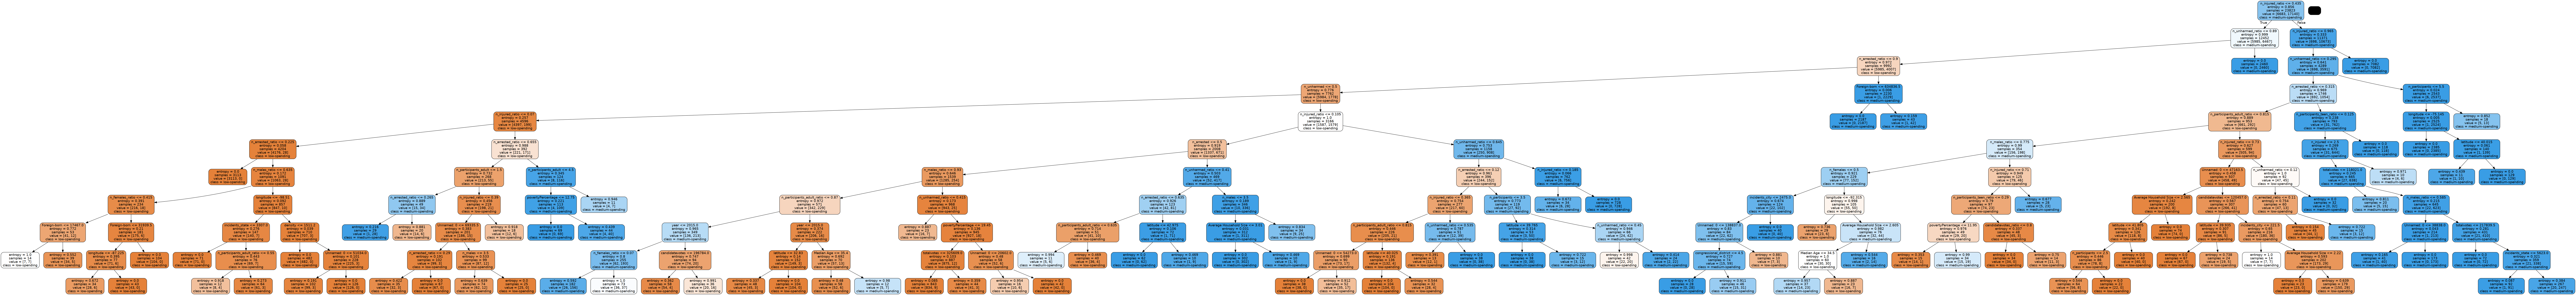

In [441]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image 
class_names=['low-spending', 'medium-spending', 'high-spending']
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=class_names,  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

#### Test

In [442]:
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

#### Evaluation

##### Discussing the possibility of overfitting

In [443]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))

Accuracy train set  0.9823699785921168
Accuracy test set  0.9798256781901871


##### Model performance on the training set

In [444]:
report_scores(train_label,train_pred_dt)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6683
           1       0.99      0.99      0.99     17140

    accuracy                           0.98     23823
   macro avg       0.98      0.98      0.98     23823
weighted avg       0.98      0.98      0.98     23823



##### Model performance on the test set

In [445]:
report_scores(test_label,test_pred_dt)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2865
           1       0.99      0.99      0.99      7346

    accuracy                           0.98     10211
   macro avg       0.97      0.98      0.98     10211
weighted avg       0.98      0.98      0.98     10211



##### Visualization of the classifier results via scatterplots

/tmp/ipykernel_731/147847295.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(test_set[a], test_set[b], c=labels[i], s=20, cmap='cividis')


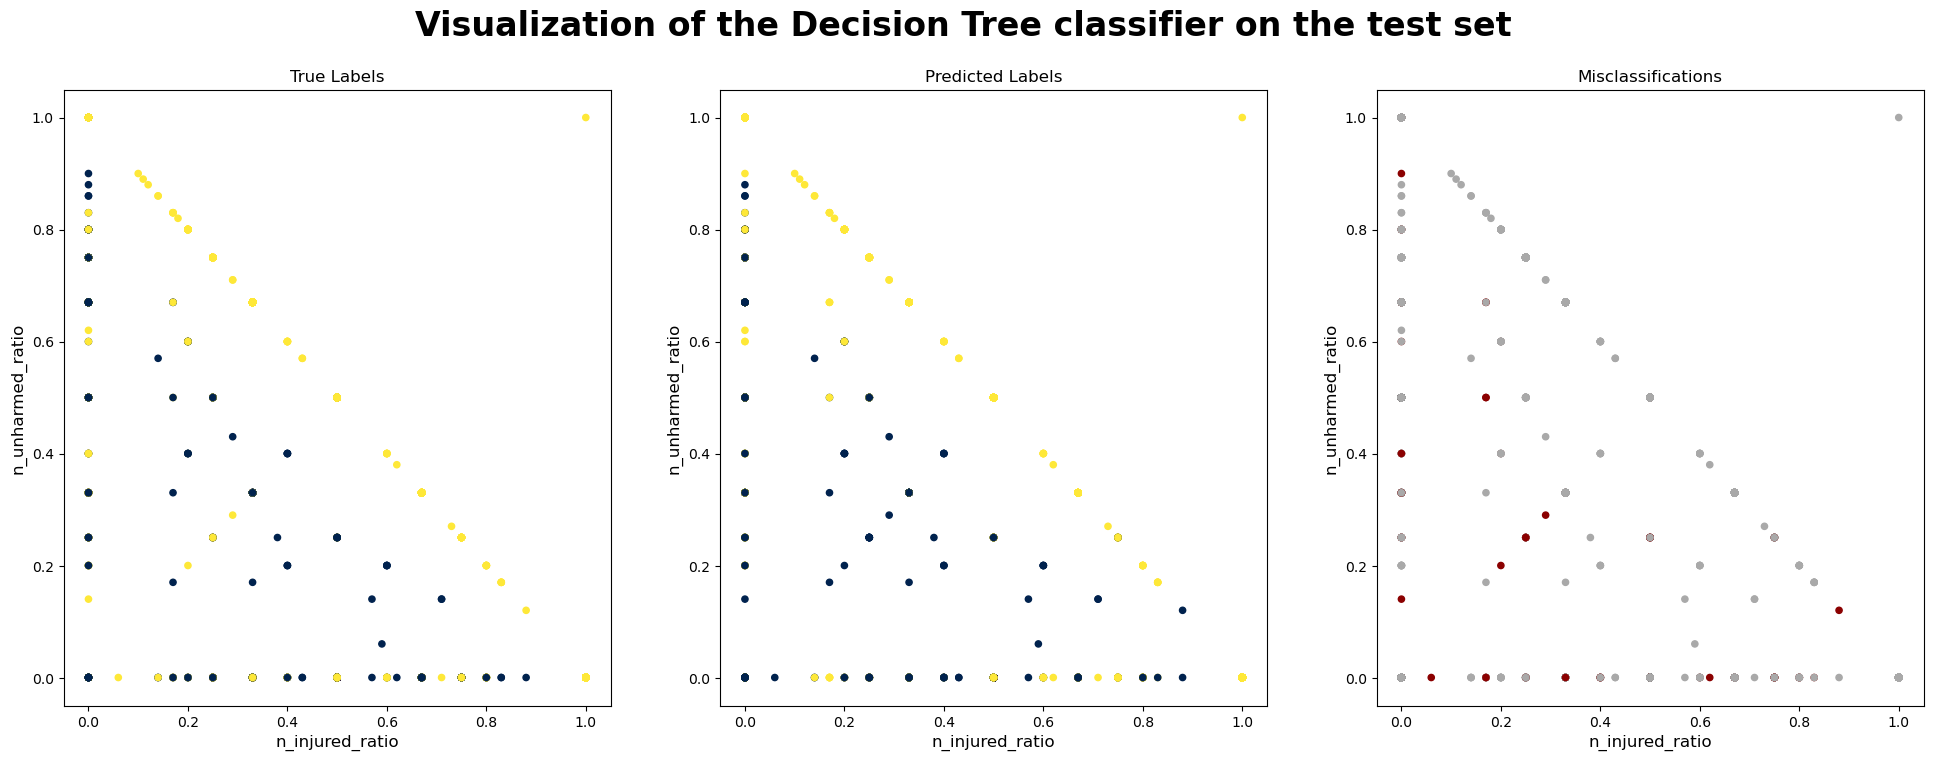

In [446]:
classification_visualizer(test_set, test_label, test_pred_dt, 'Decision Tree')

The accuracy of this model is optimal, also for the test set.The misclassified points are very few. This leads us to argue that the **Decision Tree is one of the best candidates to be the best model for our data**.

##### Confusion Matrix of the classifier

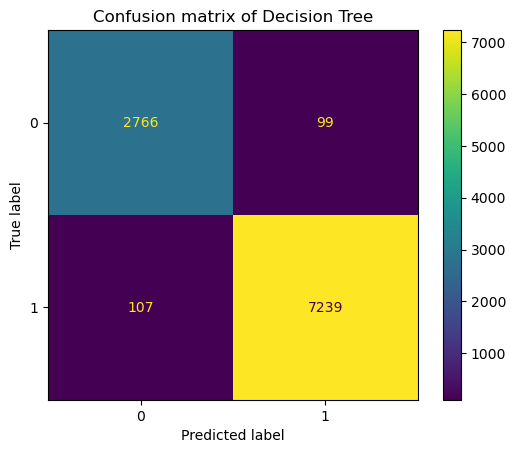

In [447]:
plot_c_matrix(test_set, test_label, test_pred_dt, dt, 'Decision Tree')

There are very few errors in class attribution for this model.

##### Visualization of the decision boundary of the classifier

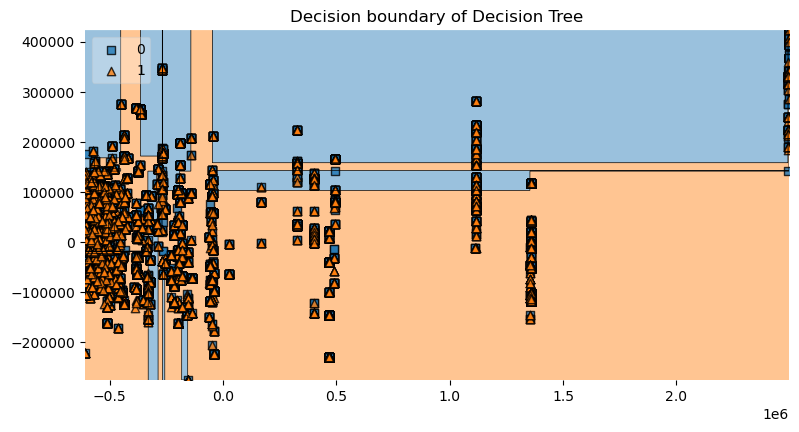

In [448]:
plot_decision_boundary(train_set, train_label, dt, 'Decision Tree')

The decision boundaries traced by this model for our data are geometric and so not-curvilinear: besides their shape, they seem to be quite precise and accurate.